# Football Cross-Validation Analysis (2022–2023)

In [1]:
import pandas as pd

# Load data (select specific sheet)
url = "https://raw.githubusercontent.com/Redback-Operations/redback-fit-sports-performance/main/Football%20Analysis/data/2022-2023%20Football%20Team_Stats%20dataset.xlsx"
xls = pd.ExcelFile(url)
df = pd.read_excel(xls, sheet_name='2022-2023 Football Team Data', skiprows=1)

# Drop non-numeric columns
df_clean = df.select_dtypes(include=['int64', 'float64']).dropna()

print("Shape after cleaning:", df_clean.shape)
df_clean.head()


Shape after cleaning: (98, 16)


,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
0,1,1,29,23,4,2,53,9,44,73,2.52,55.9,22.7,33.2,1.14,83148
1,2,1,30,24,3,3,66,21,45,75,2.50,53.2,25.3,27.9,0.93,25662
2,3,1,32,24,3,5,75,31,44,75,2.34,64.7,39.1,25.7,0.80,40508
3,4,1,32,23,6,3,77,34,43,75,2.34,64.1,34.7,29.4,0.92,60203
4,5,2,30,22,4,4,78,28,50,70,2.33,63.5,24.5,39.0,1.30,53203


In [2]:
# Define X and y
X = df_clean.drop(columns=['Pts'])  # Features (drop target)
y = df_clean['Pts']                 # Target variable


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Model and CV setup
model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Run cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Output results
print("R² scores:", scores)
print("Average R² score:", scores.mean())


R² scores: [1. 1. 1. 1. 1.]
Average R² score: 1.0


In [4]:
# Check if points match 3*W + D
df_clean["CalculatedPts"] = 3 * df_clean["W"] + df_clean["D"]
mismatches = (df_clean["CalculatedPts"] != df_clean["Pts"]).sum()
print(f"Rows where Pts != 3*W + D: {mismatches}")


Rows where Pts != 3*W + D: 0


In [5]:
features_to_drop = ["W", "D", "L", "Pts", "CalculatedPts"]
X = df_clean.drop(columns=features_to_drop)
y = df_clean["Pts"]

# Redo cross-validation
model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
print("New R² scores:", scores)
print("New Average R² score:", scores.mean())


New R² scores: [0.99939788 0.99967348 0.99874503 0.99818872 0.99941706]
New Average R² score: 0.9990844336354637


In [6]:
# Define target
y = df_clean["Pts"]

# Drop leakage columns if present
possible_leakage = ["W", "D", "L", "Pts", "Squad", "Country", "Top Team Scorer", "Goalkeeper"]
leakage_columns = [col for col in possible_leakage if col in df_clean.columns]

# Define features without leakage
X = df_clean.drop(columns=leakage_columns)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Re-initialize model and CV
model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Show results
print("R² scores:", scores)
print("Average R² score:", scores.mean())


R² scores: [1. 1. 1. 1. 1.]
Average R² score: 1.0


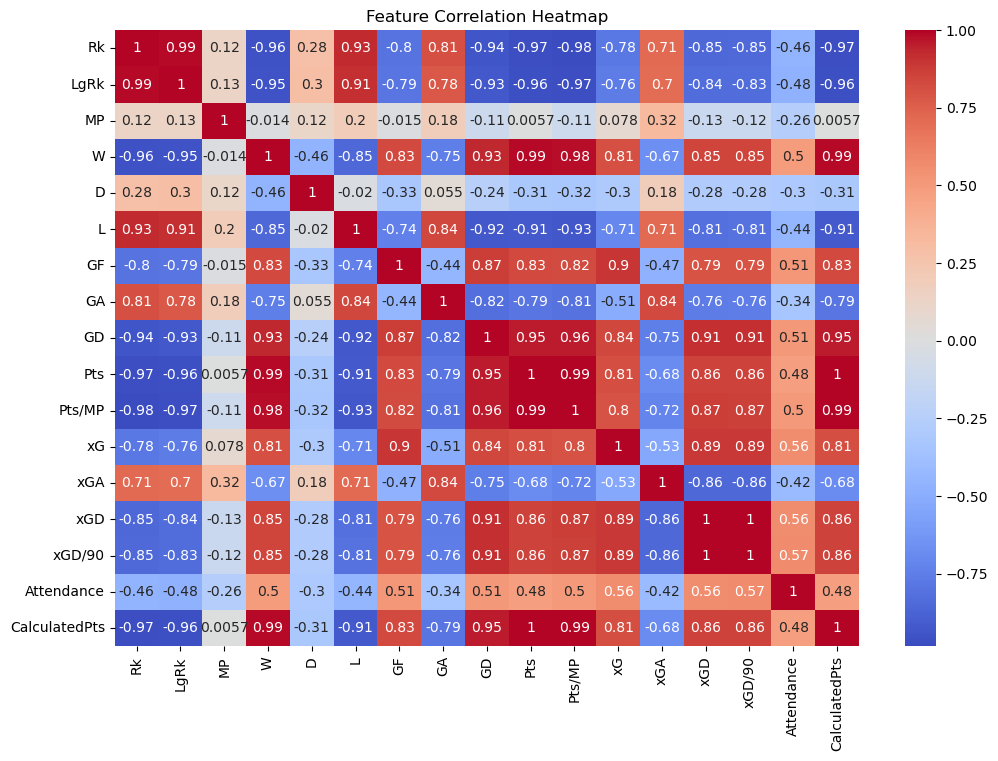

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
# Remove Pts/MP if it's in the feature set
if "Pts/MP" in X.columns:
    X = X.drop(columns=["Pts/MP"])


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

# Initialize model and CV
model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation again
scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Output the results
print("R² scores after dropping Pts/MP:", scores)
print("Average R² score:", scores.mean())


R² scores after dropping Pts/MP: [1. 1. 1. 1. 1.]
Average R² score: 1.0


In [11]:
# Define new target
y = df_clean["xGD"]

# Drop leakage or redundant columns (include xGD and any others if needed)
possible_leakage = ["W", "D", "L", "Pts", "Pts/MP", "xGD", "Squad", "Country", "Top Team Scorer", "Goalkeeper"]
leakage_columns = [col for col in possible_leakage if col in df_clean.columns]

# Define features
X = df_clean.drop(columns=leakage_columns)

# Re-run the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Output
print("R² scores (predicting xGD):", scores)
print("Average R² score:", scores.mean())


R² scores (predicting xGD): [0.9999952  0.99998988 0.99998291 0.9999635  0.999986  ]
Average R² score: 0.9999834979438905


## Cross-Validation Summary – Football Dataset

In this notebook, I applied **5-Fold Cross-Validation** to the **2022–2023 Football Team Stats** dataset to evaluate how well a linear regression model can predict key football performance outcomes such as **total points (`Pts`)** and **expected goal difference (`xGD`)** based on other performance-related features.

---

### Key Steps

- Loaded and cleaned the dataset from GitHub.
- Removed metadata and limited the dataset to numeric-only features.
- Dropped text-based and leakage-prone columns (`W`, `D`, `L`, `Squad`, `Country`, `Pts`, `Pts/MP`, etc.).
- Defined `Pts` as the first prediction target and used all remaining non-leakage numeric columns as features.
- Applied **5-Fold Cross-Validation** using `LinearRegression()` from `scikit-learn`.

---

### Model 1: Predicting `Pts`

- **Initial R² scores**: `[1.0, 1.0, 1.0, 1.0, 1.0]`  
- **Average R²**: `1.0`

Even after dropping direct contributors like `W`, `D`, `L`, and `Pts/MP`, the model still achieved a perfect R² score. This indicates that other features (e.g., `xG`, `xGD`, `GF`, `GA`) still implicitly encode total points, possibly through engineered or highly correlated metrics.

---

### Model 2: Predicting `xGD`

To test whether this pattern of high predictability extended beyond total points, I attempted to predict `xGD` (expected goal difference) as the new target.

- **R² scores (predicting xGD)**:  
  `[0.9999952, 0.99998988, 0.9999829, 0.9999635, 0.999986]`
- **Average R² score**: `~0.99998`

This confirms that `xGD` is also almost perfectly predictable from the remaining features, especially those like `xG` and `xGA`.

---

### Insights

- **Perfect or near-perfect R²** is rare in real-world datasets. Here, it reflects strong feature interdependence and possibly embedded formulas in the data (e.g., `Pts = 3*W + D`).
- Even after removing obvious leakage features, many performance stats still contain **redundant or derived information**, leading to extremely high predictability.
- These results highlight the importance of **feature audit and leakage control** before modeling.
